In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import sympy as sym
# import autograd.numpy as np
# from autograd import grad, hessian
from sympy import *

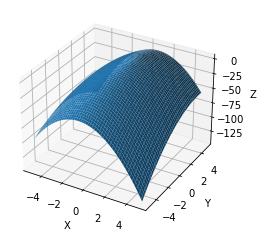

In [22]:
#meshgrid with x&y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

fxn = x*y + 4*y - 3*(x**2) - y**2

def f(x,y):
    return x*y + 4*y - 3*(x**2) - y**2

X, Y = np.meshgrid(x,y)
Z = f(X, Y)

#3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

#labels for axes 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

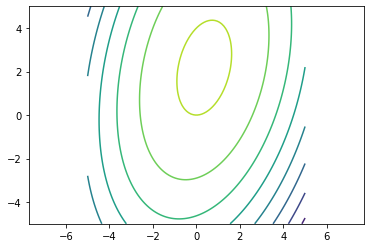

In [23]:
plt.axis("equal")
plt.contour(X, Y, Z)

In [24]:
#hessian matrix
x = sym.symbols('x')
y = sym.symbols('y')
f = x*y + 4*y - 3*(x**2) - y**2
xini = sym.Matrix([0,0])

hessian = sym.Matrix([[sym.diff(f, x, x), sym.diff(f, x, y)],
                      [sym.diff(f, y, x), sym.diff(f, y, y)]])

print("Hessian Matrix: ", hessian)
hessianInv = hessian.inv()
print("Inverse Hessian Matrix: ", hessianInv)

grad_fxn = sym.Matrix([sym.diff(f, x), sym.diff(f, y)])
print("Gradient: ", grad_fxn)

tol = 1e-6
iters = 1000
traj = []

for i in range(iters):
    grad_x = grad_fxn.subs({x: xini[0], y: xini[1]})
    x_n1 = xini - hessianInv * grad_x
    print(x_n1.evalf())
   
    traj.append((float(xini[0]), float(xini[1])))
    
    
    if(x_n1-xini).norm()<tol:
        print("\nSolution converged after", i, "iterations.")
        print("Root is approximately", x_n1.evalf())
        traj.append((float(x_n1[0]), float(x_n1[1])))
        break
    xini = x_n1
    
else:
    print("Solution did not converge after", iters, "iterations.")


Hessian Matrix:  Matrix([[-6, 1], [1, -2]])
Inverse Hessian Matrix:  Matrix([[-2/11, -1/11], [-1/11, -6/11]])
Gradient:  Matrix([[-6*x + y], [x - 2*y + 4]])
Matrix([[0.363636363636364], [2.18181818181818]])
Matrix([[0.363636363636364], [2.18181818181818]])

Solution converged after 1 iterations.
Root is approximately Matrix([[0.363636363636364], [2.18181818181818]])


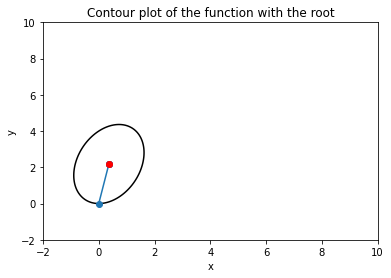

In [34]:
# Convert the function to a NumPy function for plotting
f_np = sym.lambdify((x, y), f, 'numpy')
x_range = np.linspace(-2, 10, 200)
y_range = np.linspace(-2, 10, 200)
# Create a grid of x and y values
X, Y = np.meshgrid(x_range, y_range)

# Evaluate the function on the grid
Z = f_np(X, Y)

# Plot the contour lines
plt.contour(X, Y, Z, levels=[0], colors='k')

# Plot the root as a red dot
plt.plot(x_n1[0], x_n1[1], 'ro')
x_traj = [point[0] for point in traj]
y_traj = [point[1] for point in traj]

# Plot the trajectory
plt.plot(x_traj, y_traj, '-o')
plt.plot(float(x_n1[0]), float(x_n1[1]), 'ro')

# Add axis labels and a title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of the function with the root')

# Show the plot
plt.show()

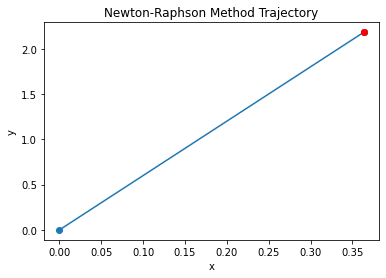

In [26]:
x_traj = [point[0] for point in traj]
y_traj = [point[1] for point in traj]

# Plot the trajectory
plt.plot(x_traj, y_traj, '-o')
plt.plot(float(x_n1[0]), float(x_n1[1]), 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Newton-Raphson Method Trajectory')
plt.show()